In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
file = open('MovieLens/ml80.train')
new = []
for i in file:
    lst = i.split()
    for j in range(len(lst)):
        lst[j] = int(lst[j])
    new.append(lst)
new = np.array(new)
file.close()
final_arr = np.zeros((new[:,0].max(), new[:,1].max()))
for i in range(len(new)):
    final_arr[new[i][0] - 1][new[i][1] - 1] = int(new[i][2])

In [3]:
file = open('MovieLens/ml20.test')
new_t = []
for i in file:
    lst = i.split()
    for j in range(len(lst)):
        lst[j] = int(lst[j])
    new_t.append(lst)
new_t = np.array(new_t)
file.close()
final_test = np.zeros((943,1682))
for i in range(len(new_t)):
    final_test[new_t[i][0] - 1][new_t[i][1] - 1] = int(new_t[i][2])

In [4]:
def krank_approx(k,X_train):
    
    U,S,Vt = np.linalg.svd(X_train,full_matrices=False)
    
    if k>=len(S):
        return X_train
    else:
        U_n = U[:,:k]
        S_n = np.diag(S[:k])
        V_n = Vt[:k,:]
        X = np.matmul(U_n,np.matmul(S_n,V_n))
    return X

In [5]:
krank_approx(5,final_arr)

array([[ 3.23430743e+00,  1.43806522e+00,  1.23417265e+00, ...,
        -1.03312399e-02,  1.94909601e-02,  4.60322764e-02],
       [ 1.22586509e+00, -2.88083617e-01,  1.62581212e-01, ...,
         1.49902353e-02, -4.54857894e-03, -1.06344165e-02],
       [-2.86424303e-01,  9.54477175e-02, -9.04171302e-03, ...,
         2.26427980e-02,  1.49362140e-03, -8.45181606e-03],
       ...,
       [ 1.28642167e+00,  1.54788629e-03,  3.34304381e-01, ...,
        -1.20322740e-03, -1.14504978e-03,  3.32772850e-03],
       [ 6.20066221e-01,  3.23389177e-01, -4.04034378e-01, ...,
         2.12430213e-02,  6.48545771e-03, -2.47168101e-02],
       [ 2.83769505e+00,  1.81793313e+00,  1.02478113e+00, ...,
        -1.02142456e-02,  2.32845587e-02,  3.28301011e-02]])

In [6]:
error = {i:0 for i in range(1,101)}
for k in [i for i in range(1,101)]:
    approx = krank_approx(k,final_arr)
    temp = 0
    for i in range(len(approx)):
        for j in range(len(approx[0])):
            if final_test[i][j]!=0:
                temp+= (approx[i][j] - final_test[i][j])**2
    error[k] = temp


In [7]:
mus = final_arr.mean(axis=1)
etas = final_arr.mean(axis=0)
baseline = []
for i in range(len(final_arr)):
    for j in range(len(final_arr[1])):
        baseline.append([mus[i],etas[j],final_arr[i][j]])
baseline= np.array(baseline)

testing = []
actual= []
for i in range(len(final_arr)):
    for j in range(len(final_arr[1])):
        if final_test[i][j]!=0:
            testing.append([mus[i],etas[j],final_test[i][j]])
            actual.append(final_test[i][j])
testing = np.array(testing)
lr = LinearRegression(fit_intercept=False)
lr.fit(baseline[:,:2],baseline[:,2])
predicted = lr.predict(testing[:,:2])
error_ = mean_squared_error(predicted, actual)*len(actual)

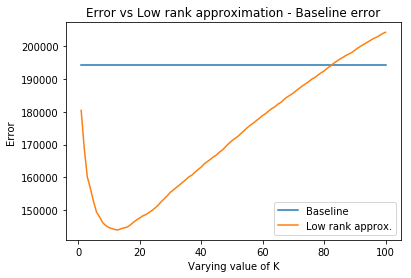

In [15]:
plt.plot([i+1 for i in range(100)], [error_ for i in range(100)],label='Baseline')
plt.plot([i+1 for i in range(100)],[error[i+1] for i in range(100)],label='Low rank approx.')
plt.title('Error vs Low rank approximation - Baseline error')
plt.xlabel('Varying value of K')
plt.ylabel('Error ')
plt.legend(loc='lower right')